## WeGo Data Introduction

In [119]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [16]:
# wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")
wego = pd.read_csv("C:\DA12\Projects\wego-python-da12-javascript-express\data\Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head()

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\NA\AppData\Local\Temp\ipykernel_13344\1061972442.py:2: SyntaxWarning: invalid escape sequence '\D'
  wego = pd.read_csv("C:\DA12\Projects\wego-python-da12-javascript-express\data\Headway Data, 8-1-2023 to 9-30-2023.csv")


,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


#### 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like? 


In [67]:
early = wego[wego['ADJUSTED_EARLY_COUNT'] == 1]
late = wego[wego['ADJUSTED_LATE_COUNT'] == 1]
on_time = wego[wego['ADJUSTED_ONTIME_COUNT'] == 1]

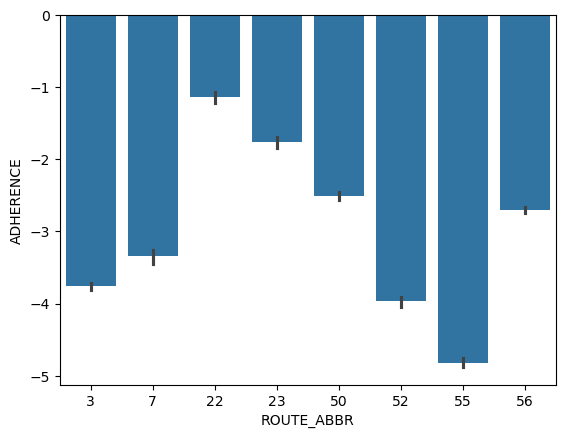

In [47]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADHERENCE'])
plt.show()

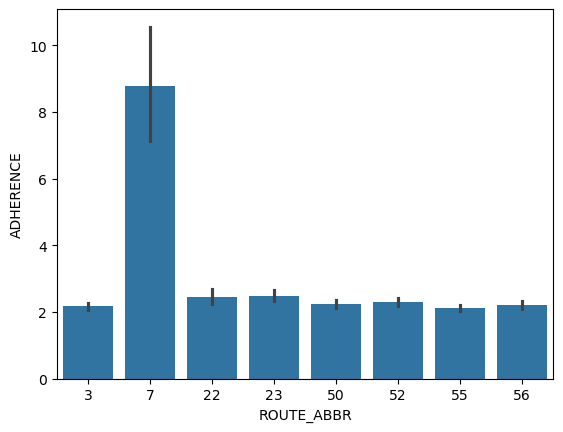

In [61]:
sns.barplot(x=early['ROUTE_ABBR'], y=early['ADHERENCE'])
plt.show()

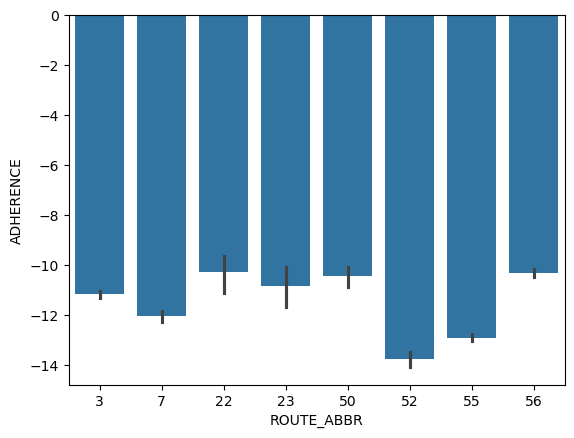

In [63]:
sns.barplot(x=late['ROUTE_ABBR'], y=late['ADHERENCE'])
plt.show()

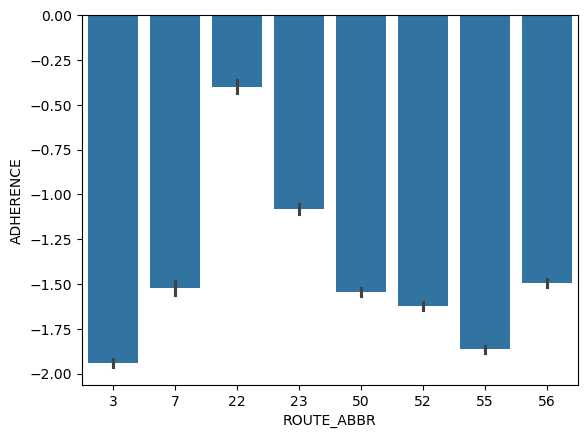

In [69]:
sns.barplot(x=on_time['ROUTE_ABBR'], y=on_time['ADHERENCE'])
plt.show()

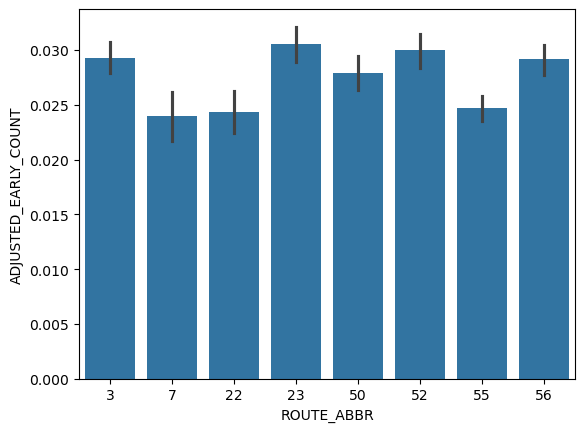

In [71]:
sns.barplot(x=wego['ROUTE_ABBR'], y=wego['ADJUSTED_EARLY_COUNT'])
plt.show()

In [191]:
# jon's code
sns.barplot(x=we_go1['ROUTE_ABBR'], y=we_go1['ADHERENCE'])
10:47
ax = sns.scatterplot(data=we_go_scatter,
                     x='ROUTE_ABBR',
                     y='ADHERENCE',
                     hue='ADJUSTED_ONTIME_COUNT',
                     palette='husl')
# Adding text annotations
for i in range(we_go_scatter.shape[0]):
    plt.text(x=we_go_scatter['ROUTE_ABBR'][i] + 1,
             y=we_go_scatter['ADHERENCE'][i],
             s=we_go_scatter['ADJUSTED_ONTIME_COUNT'][i],
             fontsize=7,
             ha='center',
             va='bottom')
# Setting the minimum value for the y-axis
ax.set_ylim(bottom=we_go_scatter['ADHERENCE'].min())
plt.legend(bbox_to_anchor=(1.01, .95), loc='upper left', borderaxespad=0.)
plt.title('title')
plt.xlabel('x label')
plt.ylabel('y label')
# plt.savefig(r'C:\Users\johnc\Desktop\DA12\Python\opioids_deaths11.png', bbox_inches='tight')
plt.show()

SyntaxError: illegal target for annotation (3964872748.py, line 3)

In [189]:
'''
ax = sns.histplot(data=wego, x='ADHERENCE', bins=800)
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Add labels only to non-zero bins
        ax.text(patch.get_x() + patch.get_width() / 2,  # X position
                height,  # Y position
                int(height),  # Label text (convert count to int)
                ha='center', va='bottom')  # Center the text
plt.xlim(-40, 10)
plt.show()
'''

"\nax = sns.histplot(data=wego, x='ADHERENCE', bins=800)\nfor patch in ax.patches:\n    height = patch.get_height()\n    if height > 0:  # Add labels only to non-zero bins\n        ax.text(patch.get_x() + patch.get_width() / 2,  # X position\n                height,  # Y position\n                int(height),  # Label text (convert count to int)\n                ha='center', va='bottom')  # Center the text\nplt.xlim(-40, 10)\nplt.show()\n"

In [187]:
'''
plt.figure(figsize=(12, 6))  # Adjust the size as needed, e.g., 10 inches wide, 6 inches tall
time_bins = np.arange(-40, 10, 1)  # Creates bins from -40 to 10 in intervals of 1 min 
ax = sns.histplot(data=wego, x='ADHERENCE', bins=time_bins, hue=wego['ADJUSTED_ONTIME_COUNT'])

plt.xlim(-40, 10)
plt.title('Distribution of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Count')
plt.show()
'''

"\nplt.figure(figsize=(12, 6))  # Adjust the size as needed, e.g., 10 inches wide, 6 inches tall\ntime_bins = np.arange(-40, 10, 1)  # Creates bins from -40 to 10 in intervals of 1 min \nax = sns.histplot(data=wego, x='ADHERENCE', bins=time_bins, hue=wego['ADJUSTED_ONTIME_COUNT'])\n\nplt.xlim(-40, 10)\nplt.title('Distribution of Adherence')\nplt.xlabel('Adherence (minutes)')\nplt.ylabel('Count')\nplt.show()\n"

In [1]:
def plot_distribution(data):
    plt.figure(figsize=(12, 6))
    time_bins = np.arange(-40, 10, 1)  # Creates bins from -40 to 10 in intervals of 1 min
    ax = sns.histplot(data=data, x='ADHERENCE', bins=time_bins, color='gray')
    
    # Iterate over the bars (patches) to set colors based on the bin edges
    for patch in ax.patches:
        bin_start = patch.get_x()
        bin_end = patch.get_x() + patch.get_width()
        height = patch.get_height()
        if bin_end <= -6:
            patch.set_facecolor('slategrey')  # Color for bins ending before 6 minutes
        elif bin_start >= 1:
            patch.set_facecolor('slategrey')   # Color for bins starting after 1 minute
        else:
            patch.set_facecolor('royalblue')  # Default color for bins in between
    
    plt.xlim(-40, 10)
    plt.title('Distribution of Adherence')
    plt.xlabel('Adherence (minutes)')
    plt.ylabel('Count')
    tick_locations = np.arange(-40, 11, 5)  # Set tick marks every 1 unit from -40 to 10
    plt.xticks(ticks=tick_locations)
    plt.show()  

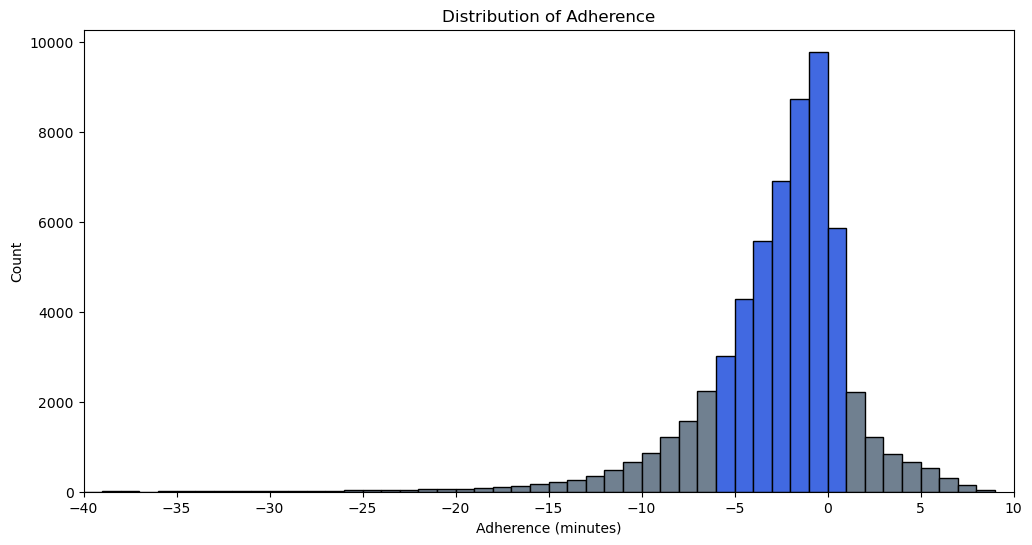

In [251]:
route_56 = wego[wego['ROUTE_ABBR'] == 56]
plot_distribution(route_56)

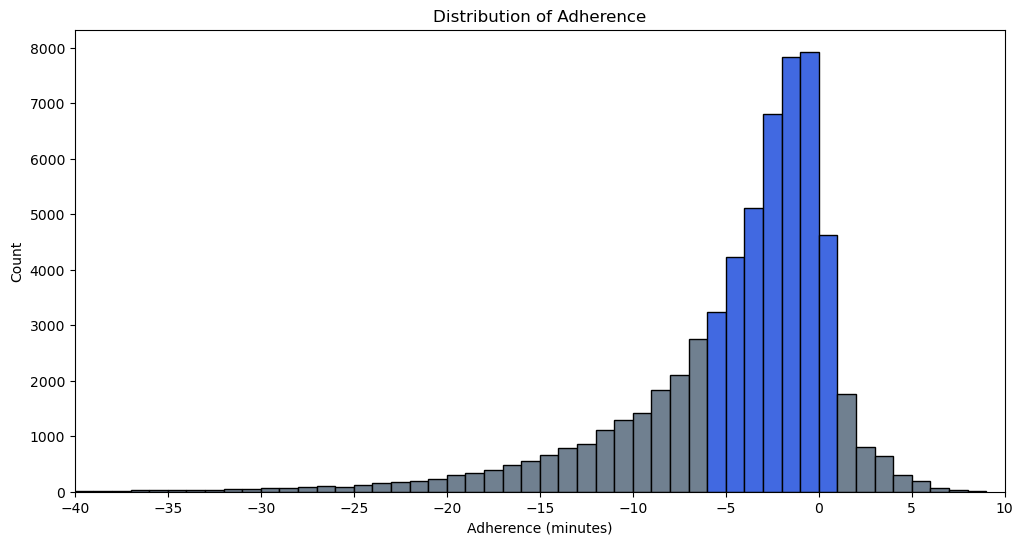

In [195]:
route_55 = wego[wego['ROUTE_ABBR'] == 55]
plt.figure(figsize=(12, 6))
time_bins = np.arange(-40, 10, 1)  # Creates bins from -40 to 10 in intervals of 1 min
ax = sns.histplot(data=route_55, x='ADHERENCE', bins=time_bins, color='gray')

# Iterate over the bars (patches) to set colors based on the bin edges
for patch in ax.patches:
    bin_start = patch.get_x()
    bin_end = patch.get_x() + patch.get_width()
    height = patch.get_height()
    if bin_end <= -6:
        patch.set_facecolor('slategrey')  # Color for bins ending before 6 minutes
    elif bin_start >= 1:
        patch.set_facecolor('slategrey')   # Color for bins starting after 1 minute
    else:
        patch.set_facecolor('royalblue')  # Default color for bins in between

plt.xlim(-40, 10)
plt.title('Distribution of Adherence')
plt.xlabel('Adherence (minutes)')
plt.ylabel('Count')
tick_locations = np.arange(-40, 11, 5)  # Set tick marks every 1 unit from -40 to 10
plt.xticks(ticks=tick_locations)
plt.show()

In [3]:
#test

#### 2. How does direction of travel, route, or location affect the headway and on-time performance?


#### 3. How does time of day or day of week affect headway and on-time performance?


#### 4. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.


#### 5. Is there any relationship between lateness (ADHERENCE) and headway deviation?


#### 6. How much impact does being late or too spaced out at the first stop have downstream?  


#### 7. What is the impact of the layover at the start of the trip (the difference between the first stop arrival and departure time)? Does more dwell time at the beginning of a trip lead to more stable headways (lower values for % headway deviation)? Do trips with longer **scheduled** layover time have more stable headway values?  


#### 8. What is the relationship between distance or time traveled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has traveled?


In [4]:
#wego.columns

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [26]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [18]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [20]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [22]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [ ]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

And one which was early.

In [ ]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [ ]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [ ]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]